In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [38]:
file_path = '/Users/ayyoub-maulana/gitRepo/k-means-cluster/data/country_location.csv'

sns.set()

data = pd.read_csv(file_path)

print(data)


     Country  Latitude  Longitude Language
0        USA     44.97    -103.77  English
1     Canada     62.40     -96.80  English
2     France     46.75       2.40   French
3         UK     54.01      -2.53  English
4    Germany     51.15      10.40   German
5  Australia    -25.45     133.11  English


In [39]:
x = data.iloc[:,1:3]

x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [43]:
import pickle

n_cluster = 3

kmeans = KMeans(n_cluster)
kmeans.fit(x)

with open('/Users/ayyoub-maulana/gitRepo/k-means-cluster/output/kmeans_location.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
identified_clusters = kmeans.fit_predict(x)

print(identified_clusters)

[2 2 1 1 1 0]


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
data_with_clusters = data.copy()

data_with_clusters

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [23]:
data_with_clusters['Clusters'] = identified_clusters

data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


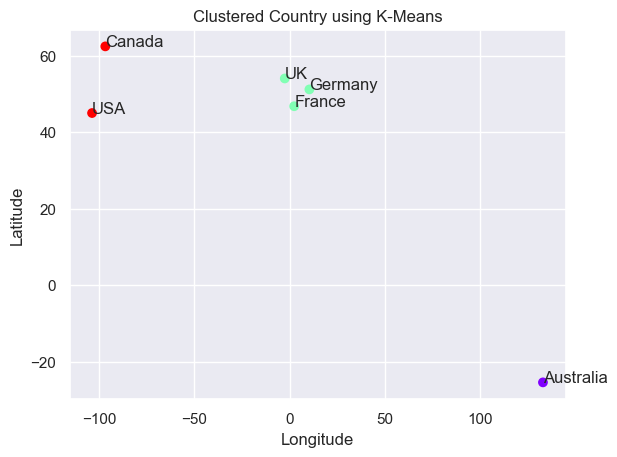

In [24]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')

# label plot
plt.title('Clustered Country using K-Means')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# anotasi plot
for i, txt in enumerate(data_with_clusters['Country']):
    plt.annotate(txt, (x.loc[i, 'Longitude'], x.loc[i, 'Latitude']))


# Elbow method untuk mencari jumlah cluster yang tepat

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [29]:
sns.set()

data = pd.read_csv(file_path)

data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [30]:
x = data.iloc[:, 1:3]

x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [32]:
max_cluster = 7

wcss=[]
number_clusters = range(1, max_cluster)

number_clusters

range(1, 7)

In [33]:
for n_cluster in number_clusters:
    kmeans = KMeans(n_cluster)

    # fitting model
    kmeans.fit(x)

    # wcss
    wcss_iter = kmeans.inertia_

    wcss.append(wcss_iter)

wcss

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/clust

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

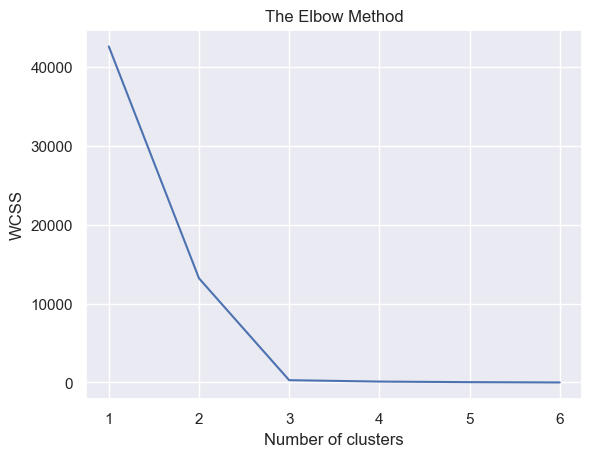

In [34]:
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()